

# Project: U.S. Census Data Demographics and Their Correlation to Total Guns/Permits at the State Level.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


I am analyzing the relationship between various state demographics as available from U.S. Census Data and their correlation with proportion of guns compared to total population in those states. The main questions I will be exploring in my analysis are:

1. Does the amount of veterans in a state strongly correlate with the amount of guns/permits?
2. Do states with more females have any sort of correlation with the amount of guns/permits?
3. Does higher education have any sort of correlation with the amount of guns/permits?


In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:20,.2f}'.format
pd.set_option('display.max_columns', 70)
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### Loading In The Data

In [158]:
gun = pd.read_csv('gun_data.csv')
census = pd.read_csv('census.csv')



### Data Cleaning

In [159]:
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

Upon examination of the gun dataset, it seems that it is broken down specifically into total number of permits as well as total number of each specific type of gun and then further into how these guns were acquired (rentals, private sales, etc.). For the purposes of our project analysis, I believe it is appropriate here to focus specifically on the "Totals" column as a representation of the amount of guns/permits altogether in the state. Thankfully, the NICS data is quite clean and does not require much cleanup after this step.

In [160]:
# In this first step, we are going to trim the data down to just July 2016
# since this date corresponds with most of the information provided by the U.S. Census Data.

gun.drop(gun.index[:770],inplace=True)
gun.drop(gun.index[55:],inplace=True)

In [161]:
gun

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
770,2016-07,Alabama,"27,765.00",0.00,"10,132.00","7,392.00",538.00,465,0.00,5.00,3.00,0.00,"1,457.00","1,151.00",3.00,0.00,0.00,0.00,nan,nan,9.00,5.00,0.00,1.00,1.00,0.00,48927
771,2016-07,Alaska,215.00,0.00,"2,898.00","2,816.00",239.00,165,0.00,7.00,10.00,0.00,200.00,178.00,4.00,20.00,16.00,0.00,nan,nan,7.00,17.00,0.00,1.00,0.00,0.00,6793
772,2016-07,Arizona,"7,863.00",308.00,"13,693.00","8,643.00","1,283.00",642,0.00,5.00,10.00,0.00,"1,272.00",631.00,7.00,103.00,13.00,0.00,nan,nan,13.00,9.00,0.00,0.00,1.00,0.00,34496
773,2016-07,Arkansas,"4,116.00",677.00,"6,323.00","5,053.00",325.00,367,2.00,6.00,14.00,0.00,"1,001.00","1,476.00",4.00,0.00,0.00,0.00,nan,nan,7.00,5.00,1.00,0.00,1.00,0.00,19378
774,2016-07,California,"77,962.00",0.00,"46,361.00","47,594.00","17,297.00",0,0.00,0.00,0.00,0.00,492.00,504.00,8.00,0.00,0.00,0.00,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,190218
775,2016-07,Colorado,"6,372.00",0.00,"18,765.00","15,176.00","1,505.00",1054,0.00,0.00,0.00,0.00,0.00,0.00,0.00,191.00,31.00,0.00,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,43094
776,2016-07,Connecticut,"14,156.00",0.00,"11,328.00","4,015.00",252.00,0,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,29755
777,2016-07,Delaware,755.00,0.00,"1,859.00","1,569.00",140.00,74,0.00,0.00,1.00,0.00,15.00,8.00,0.00,0.00,0.00,0.00,nan,nan,45.00,22.00,5.00,1.00,0.00,0.00,4494
778,2016-07,District of Columbia,0.00,0.00,57.00,1.00,0.00,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,60
779,2016-07,Florida,"28,106.00",0.00,"57,902.00","28,000.00","4,504.00",2324,12.00,8.00,2.00,0.00,"2,984.00","1,198.00",9.00,99.00,7.00,1.00,nan,nan,39.00,12.00,1.00,0.00,0.00,0.00,125208


In [162]:
# In this next step, we condense the dataframe to just show us the "Totals" column
# as we mentioned earlier.

gun = pd.DataFrame(data = [gun.month,gun.state,gun.totals]).T
gun.set_index("month")

,state,totals
month,,
2016-07,Alabama,48927
2016-07,Alaska,6793
2016-07,Arizona,34496
2016-07,Arkansas,19378
2016-07,California,190218
2016-07,Colorado,43094
2016-07,Connecticut,29755
2016-07,Delaware,4494
2016-07,District of Columbia,60


The U.S. Census data has a lot of information, but it is all represented as strings, thereby requiring a good amount of cleaning as detailed in the following cells.

In [163]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [164]:
# First, let's trim down all of the unnecessary rows that do not contain valid data.
# Then we will transpose the dataframe so that we can see all of the variables/census information
# as the dataframe columns and the states as the dataframe rows

census.set_index("Fact")
census.drop(census.index[65:],inplace=True)
census = census.T

In this next step, I set up the header names I want the dataframe to eventually use, but I chose to clean the data first as it was easier to write my code without using specific column names until after the process was done.

At this point, I also deleted the first two rows of the dataset so that the first row begins with "Alabama"

In [165]:
header = census.iloc[0]
census = census[2:]

Upon an intial examination of the census dataframe, I observed that the three main characters/issues I needed to clean up in order to properly convert the whole dataframe into float data types were:

1. Remove all "%" (Percent Sign Characters)
2. Remove all "$" (Dollar Sign Characters)
3. Remove all "," (Commas)

The following code is what I eventually constructed after much trial and error in my scratchwork jupyter notebooks. This code runs through the entire dataframe and systematically removes any of these characters that it finds in the dataset.

Note: For those columns with "%", entries that did NOT have a "%" but instead were faulty because they were being presented as a decimal (e.g. 0.01 instead of 1.00%) were accounted for and fixed accordingly

Any entries that were faulty for other reasons (e.g. some entries just had a "Z" value or had missing values) were replaced with a None.

In [166]:
for column in census:
    if census[column].str.contains("%").any():
        for y in range(len(census)):
            try:
                if "%" in census[column].iloc[y]:
                    census[column].iloc[y] = census[column].iloc[y].strip("%")
                else:
                    census[column].iloc[y] = float(census[column].iloc[y])*100
            except:
                census[column].iloc[y] = None
    
    elif census[column].str.contains("$").any():
        for y in range(len(census)):
            if "$" in census[column].iloc[y]:
                census[column].iloc[y] = census[column].iloc[y].strip("$")
                census[column].iloc[y] = census[column].iloc[y].replace(",","")
            try:
                float(census[column].iloc[y])
            except:
                census[column].iloc[y] = None
    
    if census[column].str.contains(",").any():
        for y in range(len(census)):
            census[column].iloc[y] = census[column].iloc[y].str.replace(",","")
            try:
                float(census[column].iloc[y])
            except:
                census[column].iloc[y] = None
        
    census[column] = census[column].astype("float")


C:\Users\shong01\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [167]:
# Now we can set the header we saved from earlier

census.rename(columns = header,inplace = True)

In [168]:
# Now we want to merge our two datasets and then keep our "totals" column from our gun dataset.

df = pd.merge(census, gun, left_on = census.index, right_on = "state")
df.drop(["month"],axis=1,inplace=True)
df.rename(columns={"totals":"Total Guns and Permits in State, July 2016"},inplace=True)
df.set_index("state")

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code,"Total Guns and Permits in State, July 2016"
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,"4,863,300.00","4,780,131.00",1.70,"4,779,736.00",6.00,6.40,22.60,23.70,16.10,13.80,51.60,51.50,69.30,26.80,0.70,1.40,0.10,1.60,4.20,65.80,"363,170.00",3.50,"2,230,185.00","2,171,853.00",68.70,"125,500.00","1,139.00",345.00,717.00,"15,001.00","1,848,325.00",2.55,85.30,5.20,84.30,23.50,11.80,10.70,58.00,53.00,"7,576,462.00","26,039,632.00","124,809,759.00","57,746,565.00","58,564,965.00","12,145.00",24.40,"43,623.00","24,091.00",17.10,"98,540.00","1,634,391.00","67,370,353.00",1.90,"322,025.00","374,153.00","203,604.00","137,630.00","92,219.00","272,651.00","41,943.00","316,984.00",94.40,"50,645.33",nan,48927
Alaska,"741,894.00","710,249.00",4.50,"710,231.00",7.30,7

Our dataset is now ready for analysis!

<a id='eda'></a>
## Exploratory Data Analysis


### How does Proportion of Veterans in a State's Population Correlate with Gun Ownership?

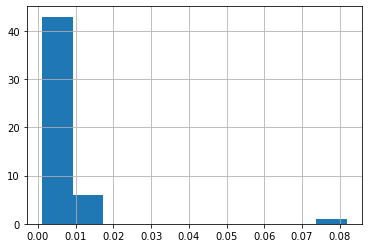

In [169]:
# To more accurately compare states with different populations (which would almost certainly
# be a confounding variable to our analysis otherwise) against each other, let's define our new variable
# "gun_proportion" variable here as a ratio of the number of guns/permits in the state compared
# to its total population.

gun_proportion = df["Total Guns and Permits in State, July 2016"]/df["Population estimates, July 1, 2016,  (V2016)"]

gun_proportion.hist();

We can immediately notice here that Kentucky is a huge outlier compared to the rest of the United States. It has a significantly higher proportion of gun owners than any other state by an enormous margin. While the reason for this peculiarity is an interesting topic to research separately, for the purposes of this project, it is easier to explore and show the correlations between variables I'm interested in inside the dataset without Kentucky's data skewing the visualization plots. Therefore, let's remove it from our dataset at this time before proceeding further with our analysis.

In [170]:
df.drop([16],inplace=True)
df.set_index('state')

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code,"Total Guns and Permits in State, July 2016"
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,"4,863,300.00","4,780,131.00",1.70,"4,779,736.00",6.00,6.40,22.60,23.70,16.10,13.80,51.60,51.50,69.30,26.80,0.70,1.40,0.10,1.60,4.20,65.80,"363,170.00",3.50,"2,230,185.00","2,171,853.00",68.70,"125,500.00","1,139.00",345.00,717.00,"15,001.00","1,848,325.00",2.55,85.30,5.20,84.30,23.50,11.80,10.70,58.00,53.00,"7,576,462.00","26,039,632.00","124,809,759.00","57,746,565.00","58,564,965.00","12,145.00",24.40,"43,623.00","24,091.00",17.10,"98,540.00","1,634,391.00","67,370,353.00",1.90,"322,025.00","374,153.00","203,604.00","137,630.00","92,219.00","272,651.00","41,943.00","316,984.00",94.40,"50,645.33",nan,48927
Alaska,"741,894.00","710,249.00",4.50,"710,231.00",7.30,7

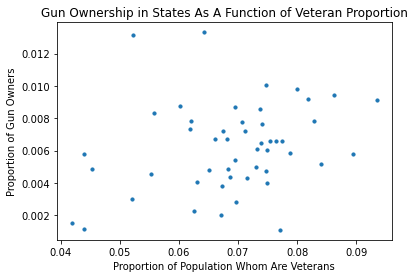

In [140]:
# We define our variable "veteran_proportion" here similarly to "gun_proportion" as explained earlier
veteran_proportion = df['Veterans, 2011-2015']/df['Population estimates, July 1, 2016,  (V2016)']
gun_proportion = df["Total Guns and Permits in State, July 2016"]/df["Population estimates, July 1, 2016,  (V2016)"]

plt.scatter(veteran_proportion,gun_proportion,s=10)
plt.xlabel('Proportion of Population Whom Are Veterans')
plt.ylabel('Proportion of Gun Owners')
plt.title('Gun Ownership in States As A Function of Veteran Proportion');

It seems that Veteran Proportion does have a positive correlation with Gun Ownership! The two states that are each above 0.012, but not really on the higher side of the spectrum for Veteran Proportion are Illinois and Indiana. Most other states look to be following the positive correlation trend quite accurately!


### Does Gender have any kind of Correlation with Gun Ownership?

In [99]:
morefemale = df["Female persons, percent,  July 1, 2016,  (V2016)"] > 50
lessfemale = df['Female persons, percent,  July 1, 2016,  (V2016)'] <= 50

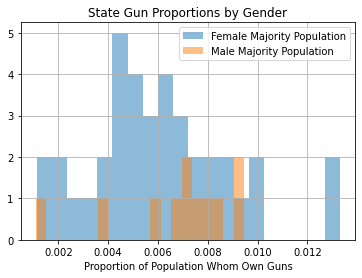

In [147]:
gun_proportion[morefemale].hist(alpha=0.5, bins=20, label = 'Female Majority Population')
gun_proportion[lessfemale].hist(alpha=0.5, bins=20, label = 'Male Majority Population')
plt.xlabel('Proportion of Population Whom Own Guns')
plt.title('State Gun Proportions by Gender')
plt.legend();

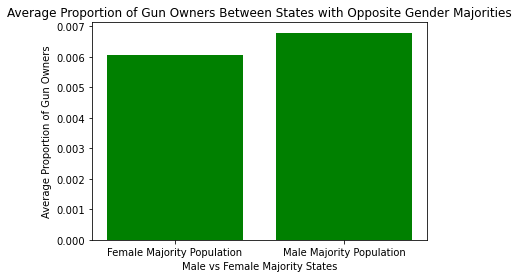

In [138]:
plt.bar(['Female Majority Population','Male Majority Population'],[gun_proportion[morefemale].mean(),gun_proportion[lessfemale].mean()],color='green')
plt.xlabel('Male vs Female Majority States')
plt.ylabel('Average Proportion of Gun Owners')
plt.title('Average Proportion of Gun Owners Between States with Opposite Gender Majorities');

The first thing we can observe here is that there are far more states that have female majorities in its population than male majorities. Secondly, although some of the highest proportions are in female majority states, it turns out that overall, male majority states have a higher overall average (0.0068) than that of female majority states (.0060). Looking at our histogram, we can see that this is because the distribution of male majority states is closely concentrated around its higher average value than compared to the female majority states, which have lots of lower values that bring its average down even though it has the two highest value states.

### Does Higher Education have any kind of Correlation with Gun Ownership?

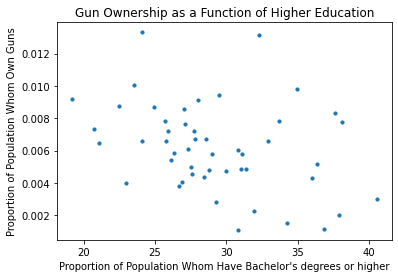

In [154]:
plt.scatter(df["Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015"],gun_proportion,s=10)
plt.xlabel("Proportion of Population Whom Have Bachelor's degrees or higher")
plt.ylabel("Proportion of Population Whom Own Guns")
plt.title('Gun Ownership as a Function of Higher Education');

It seems that having more of the population who have higher education (Bachelor's Degrees and above) has a negative correlation with gun ownership!

<a id='conclusions'></a>
## Conclusions

After investigating and analyzing the 3 main questions I posed at the start of this project, I am happy to find that I was able to observe the following trends/correlations in the data:

1. There is a positive correlation between the proportion of a state's population whom are veterans and the proportion of a state's population whom own guns/permits.

2. The cohort of states whom are male majorities have a higher proportion of gun ownership in its population compared to the cohort of states whom are female majorities.

3. There is a negative correlation between the proportion of a state's population whom have Bachelor's Degrees (or higher) and the proportion of a state's population whom own guns/permits.

However, these observations all come after explicitly excluding Kentucky from the dataset. As discussed earlier, Kentucky has such an enormous gap between its gun ownership and any other state that it was almost always an outlier on any kind of comparison between variables no matter what sort of trend we were trying to observe. 

Also, this preliminary analysis of the data does not include any sort of statistical testing which would be important in order to make more firm conclusions. The positive/negative correlations I detailed above are based on a visual glance at the resulting plots I produced, but usually we would want to calculate things like the r^2 value to back up our claims. Additionally, even if we were to perform our statistical analysis, it is important to note that all of our observations made today only imply a correlation between variables and NOT a causation. Although it is tempting to assume that veterans like to buy guns and that women/college educated individuals don't like to buy guns, we cannot definitely draw these conclusions. The fact that Kentucky completely goes against all 3 of these hypotheses is an example of where these claims would be unfounded. 


In [171]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0